In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
# 타이타닉 데이터셋 로드 (파일 경로를 적절히 설정해 주세요)
# 예를 들어 CSV 파일을 사용하는 경우
df = pd.read_csv('D:\\train.csv')

# 'SibSp'와 'Parch' 칼럼을 기준으로 내림차순 정렬
sorted_df = df.sort_values(by=['SibSp', 'Parch'], ascending=[False, False])

# 결과 출력
print(sorted_df.head())  # 상위 몇 개의 행을 출력하여 결과 확인

     PassengerId  Survived  Pclass                          Name     Sex  Age  \
159          160         0       3    Sage, Master. Thomas Henry    male  NaN   
180          181         0       3  Sage, Miss. Constance Gladys  female  NaN   
201          202         0       3           Sage, Mr. Frederick    male  NaN   
324          325         0       3      Sage, Mr. George John Jr    male  NaN   
792          793         0       3       Sage, Miss. Stella Anna  female  NaN   

     SibSp  Parch    Ticket   Fare Cabin Embarked  
159      8      2  CA. 2343  69.55   NaN        S  
180      8      2  CA. 2343  69.55   NaN        S  
201      8      2  CA. 2343  69.55   NaN        S  
324      8      2  CA. 2343  69.55   NaN        S  
792      8      2  CA. 2343  69.55   NaN        S  


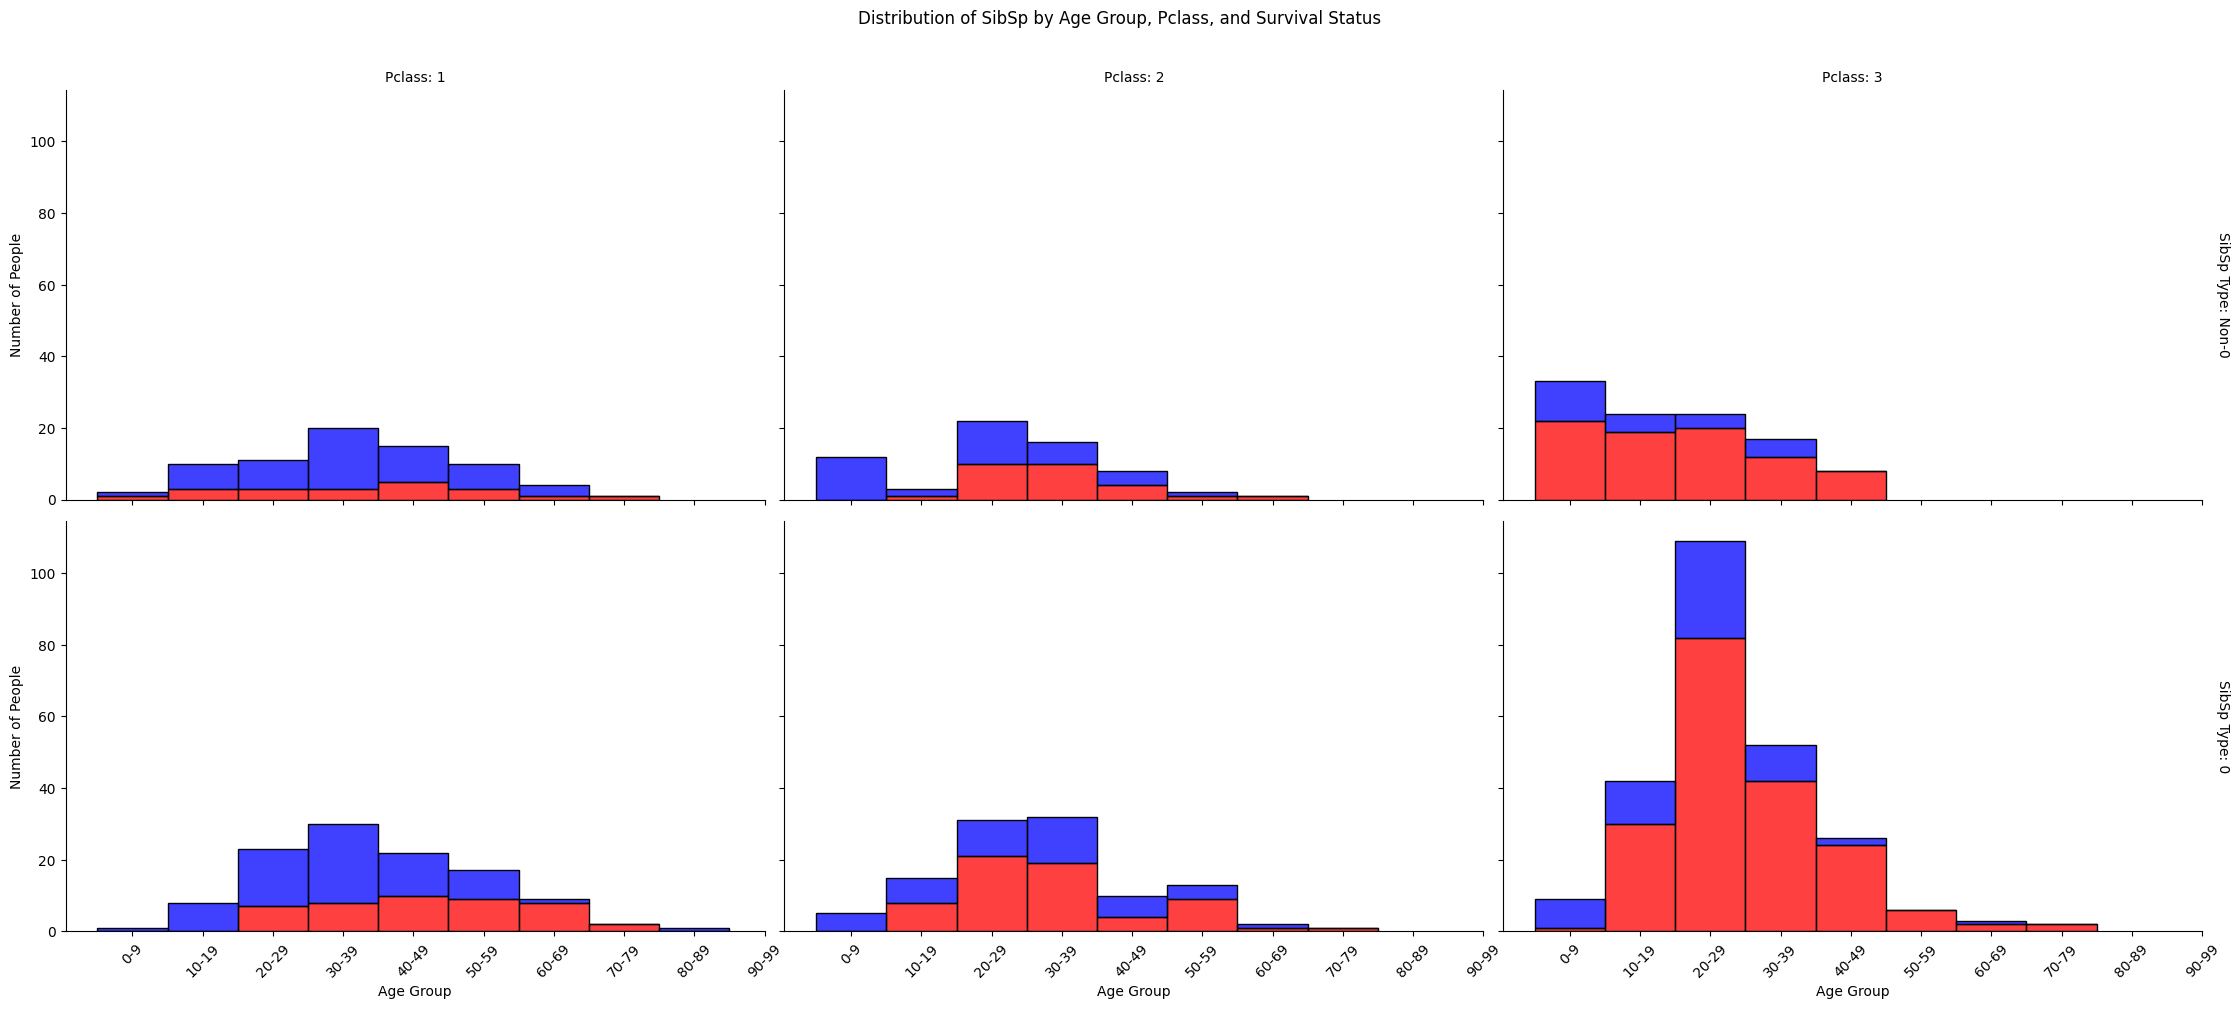

In [40]:
# 나이를 10살 단위로 구간화
df['AgeGroup'] = pd.cut(df['Age'], bins=range(0, 101, 10), right=False, labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])

# SibSp가 0 또는 0이 아닌 경우로 나누기
df['SibSpType'] = df['SibSp'].apply(lambda x: '0' if x == 0 else 'Non-0')

# FacetGrid를 사용하여 Pclass별로 나이대와 SibSp 유형별로 인원 수를 시각화
g = sns.FacetGrid(df, col='Pclass', row='SibSpType', margin_titles=True, height=5, aspect=1.5, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x='AgeGroup', hue='Survived', multiple='stack', stat='count', palette={0: 'red', 1: 'blue'}, hue_order=[1, 0])

# X축 레이블을 설정하기 위한 사전 설정
for ax in g.axes.flat:
    ax.set_xticks(range(len(df['AgeGroup'].cat.categories)))
    ax.set_xticklabels(df['AgeGroup'].cat.categories, rotation=45)

# 그래프 제목 및 레이블 설정
g.set_axis_labels('Age Group', 'Number of People')
g.set_titles(row_template='SibSp Type: {row_name}', col_template='Pclass: {col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of SibSp by Age Group, Pclass, and Survival Status')
plt.show()

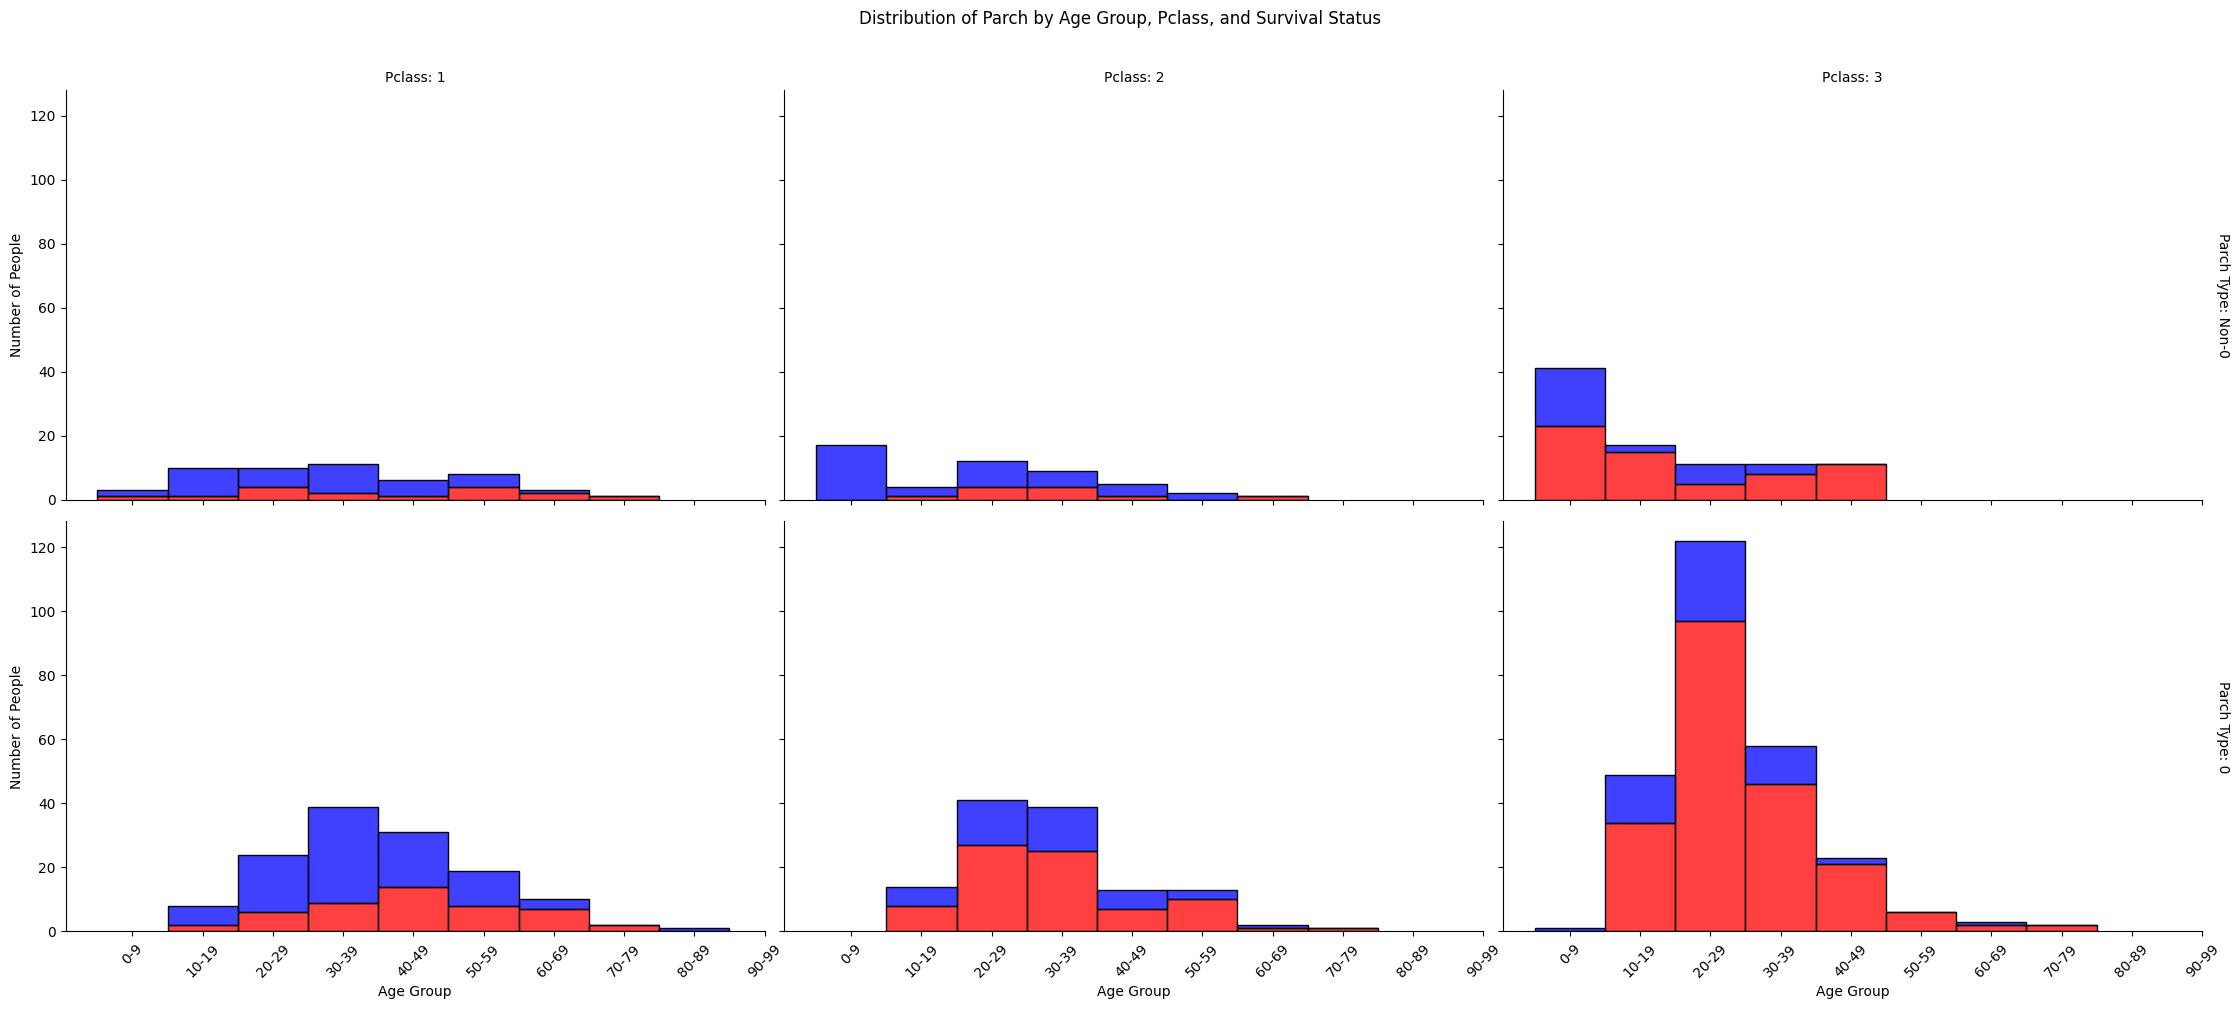

In [41]:
# 나이를 10살 단위로 구간화
df['AgeGroup'] = pd.cut(df['Age'], bins=range(0, 101, 10), right=False, labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])

# Parch가 0 또는 0이 아닌 경우로 나누기
df['ParchType'] = df['Parch'].apply(lambda x: '0' if x == 0 else 'Non-0')

# FacetGrid를 사용하여 Pclass별로 나이대와 Parch 유형별로 인원 수를 시각화
g = sns.FacetGrid(df, col='Pclass', row='ParchType', margin_titles=True, height=5, aspect=1.5, sharex=True, sharey=True, row_order=['Non-0', '0'])
g.map_dataframe(sns.histplot, x='AgeGroup', hue='Survived', multiple='stack', stat='count', palette={0: 'red', 1: 'blue'}, hue_order=[1, 0])

# X축 레이블을 설정하기 위한 사전 설정
for ax in g.axes.flat:
    ax.set_xticks(range(len(df['AgeGroup'].cat.categories)))
    ax.set_xticklabels(df['AgeGroup'].cat.categories, rotation=45)

# 그래프 제목 및 레이블 설정
g.set_axis_labels('Age Group', 'Number of People')
g.set_titles(row_template='Parch Type: {row_name}', col_template='Pclass: {col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Parch by Age Group, Pclass, and Survival Status')
plt.show()

In [42]:
import pandas as pd
from scipy.stats import chi2_contingency

# 나이대와 Parch 유형을 기반으로 교차표 작성
contingency_table = pd.crosstab(df['AgeGroup'], df['ParchType'])

# 카이제곱 검정 수행
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)

# p-value가 0.05보다 작으면 두 변수 간에 통계적으로 유의미한 연관이 있다고 결론지을 수 있습니다.
if p_value < 0.05:
    print("There is a significant association between AgeGroup and ParchType.")
else:
    print("There is no significant association between AgeGroup and ParchType.")

Chi-square Statistic: 185.06755508705731
p-value: 8.871461196666604e-36
Degrees of Freedom: 8
Expected Frequencies Table:
 [[ 45.24089636  16.75910364]
 [ 74.42857143  27.57142857]
 [160.53221289  59.46778711]
 [121.85854342  45.14145658]
 [ 64.94257703  24.05742297]
 [ 35.02521008  12.97478992]
 [ 13.86414566   5.13585434]
 [  4.37815126   1.62184874]
 [  0.72969188   0.27030812]]
There is a significant association between AgeGroup and ParchType.


In [43]:
contingency_table = pd.crosstab(df['AgeGroup'], df['SibSpType'])

# 카이제곱 검정 수행
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)

# p-value가 0.05보다 작으면 두 변수 간에 통계적으로 유의미한 연관이 있다고 결론지을 수 있습니다.
if p_value < 0.05:
    print("There is a significant association between AgeGroup and SibSpType.")
else:
    print("There is no significant association between AgeGroup and SibSpType.")

Chi-square Statistic: 58.874083064586756
p-value: 7.747224909093129e-10
Degrees of Freedom: 8
Expected Frequencies Table:
 [[ 40.89915966  21.10084034]
 [ 67.28571429  34.71428571]
 [145.12605042  74.87394958]
 [110.16386555  56.83613445]
 [ 58.71008403  30.28991597]
 [ 31.66386555  16.33613445]
 [ 12.53361345   6.46638655]
 [  3.95798319   2.04201681]
 [  0.65966387   0.34033613]]
There is a significant association between AgeGroup and SibSpType.


In [44]:
# 생존 여부와 나이대별 교차표 작성
contingency_table_survived_agegroup = pd.crosstab(df['Survived'], df['AgeGroup'])

# 카이제곱 검정 수행
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_survived_agegroup)

# 결과 출력
print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)

if p_value < 0.05:
    print("There is a significant association between Survived and AgeGroup.")
else:
    print("There is no significant association between Survived and AgeGroup.")

Chi-square Statistic: 20.981462659860245
p-value: 0.0071968356978480835
Degrees of Freedom: 8
Expected Frequencies Table:
 [[ 36.81792717  60.57142857 130.6442577   99.17086835  52.85154062
   28.50420168  11.28291317   3.56302521   0.59383754]
 [ 25.18207283  41.42857143  89.3557423   67.82913165  36.14845938
   19.49579832   7.71708683   2.43697479   0.40616246]]
There is a significant association between Survived and AgeGroup.


In [45]:
# 생존 여부와 SibSp 유형별 교차표 작성
contingency_table_survived_sibsp = pd.crosstab(df['Survived'], df['SibSpType'])

# 카이제곱 검정 수행
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_survived_sibsp)

# 결과 출력
print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)

if p_value < 0.05:
    print("There is a significant association between Survived and SibSpType.")
else:
    print("There is no significant association between Survived and SibSpType.")

Chi-square Statistic: 11.45562814125045
p-value: 0.0007127779147796147
Degrees of Freedom: 1
Expected Frequencies Table:
 [[374.62626263 174.37373737]
 [233.37373737 108.62626263]]
There is a significant association between Survived and SibSpType.


In [46]:
# 생존 여부와 Parch 유형별 교차표 작성
contingency_table_survived_parch = pd.crosstab(df['Survived'], df['ParchType'])

# 카이제곱 검정 수행
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_survived_parch)

# 결과 출력
print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)

if p_value < 0.05:
    print("There is a significant association between Survived and ParchType.")
else:
    print("There is no significant association between Survived and ParchType.")

Chi-square Statistic: 18.656359965476746
p-value: 1.5652427255789988e-05
Degrees of Freedom: 1
Expected Frequencies Table:
 [[417.75757576 131.24242424]
 [260.24242424  81.75757576]]
There is a significant association between Survived and ParchType.


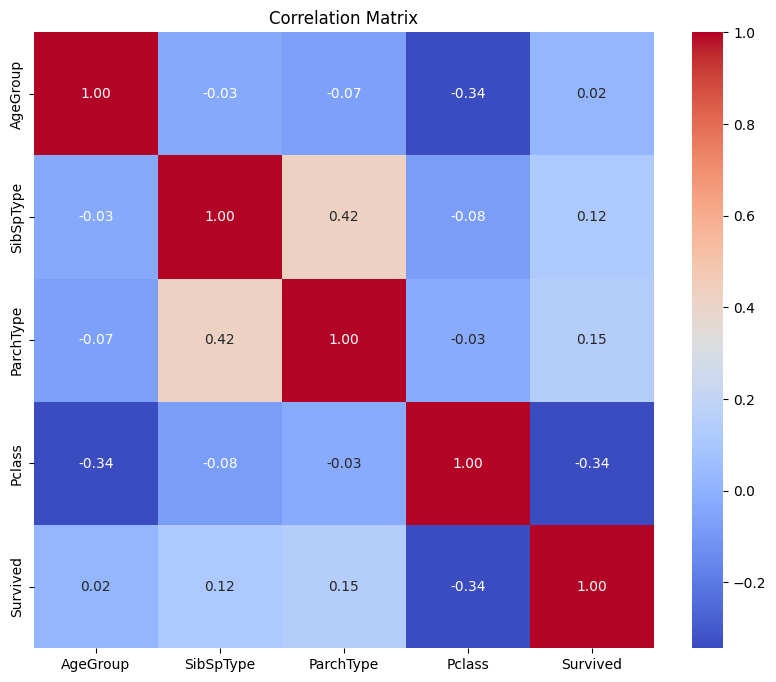

         AgeGroup   SibSpType   ParchType      Pclass    Survived
count  891.000000  891.000000  891.000000  891.000000  891.000000
mean     1.824916    0.317621    0.239057    1.308642    0.383838
std      1.943207    0.465813    0.426747    0.836071    0.486592
min     -1.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000    0.000000    1.000000    0.000000
50%      2.000000    0.000000    0.000000    2.000000    0.000000
75%      3.000000    1.000000    0.000000    2.000000    1.000000
max      8.000000    1.000000    1.000000    2.000000    1.000000


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# 범주형 변수를 코드로 변환
df_encoded = df[['AgeGroup', 'SibSpType', 'ParchType', 'Pclass', 'Survived']].copy()
df_encoded = df_encoded.apply(lambda x: x.astype('category').cat.codes)

# 상관 행렬 계산 및 시각화
corr_matrix = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Visualizing training data category frequencies...


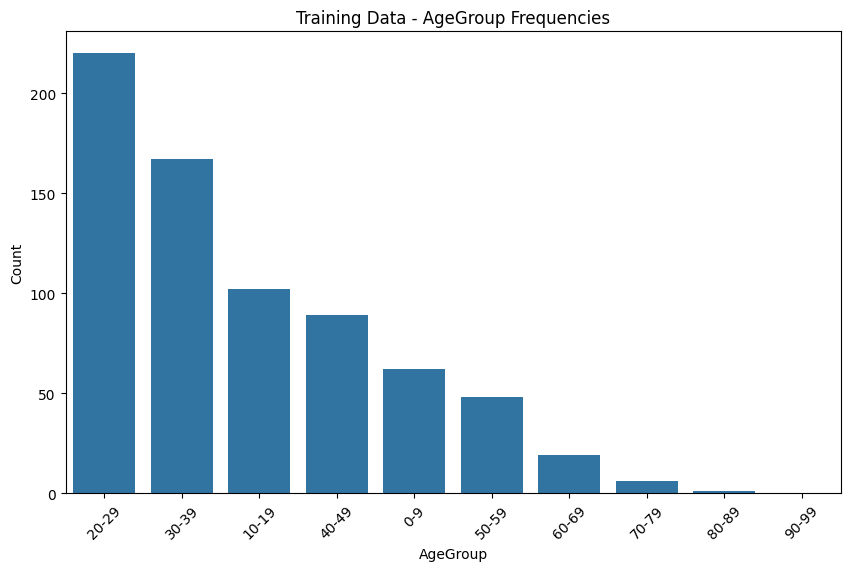

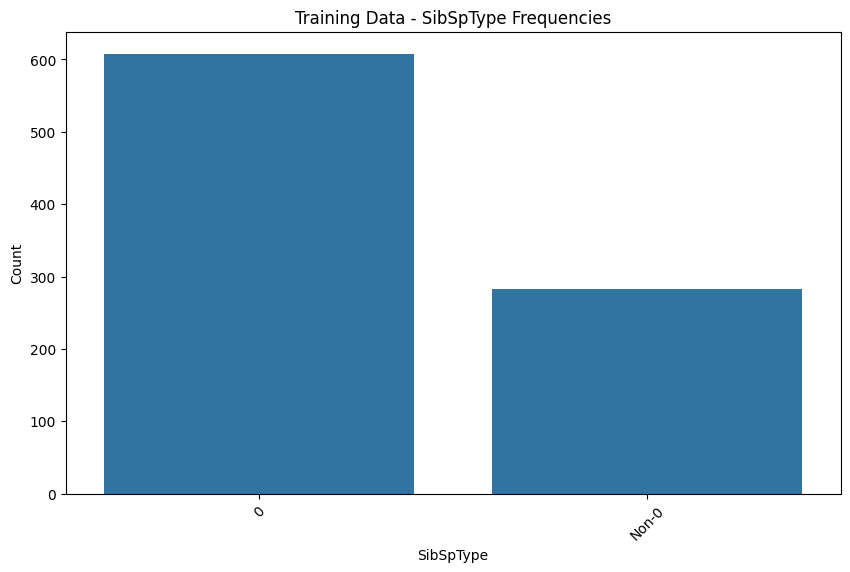

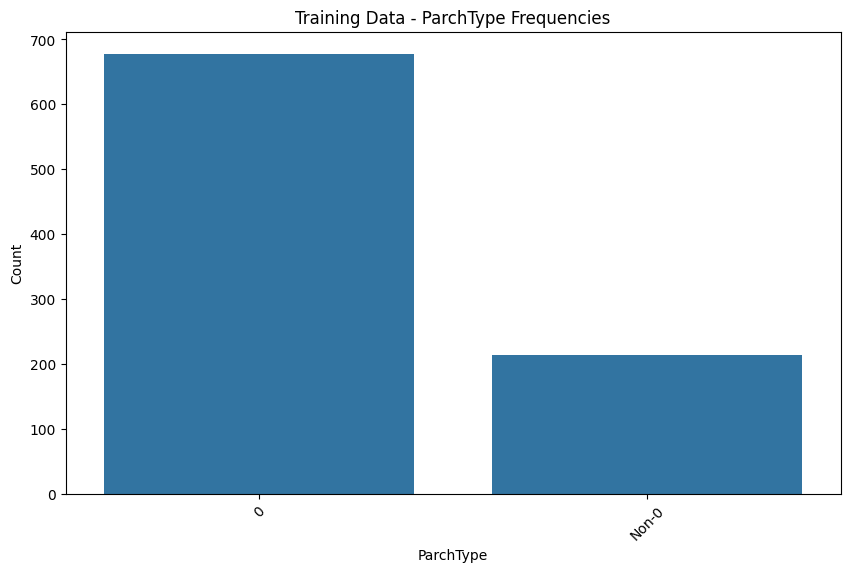

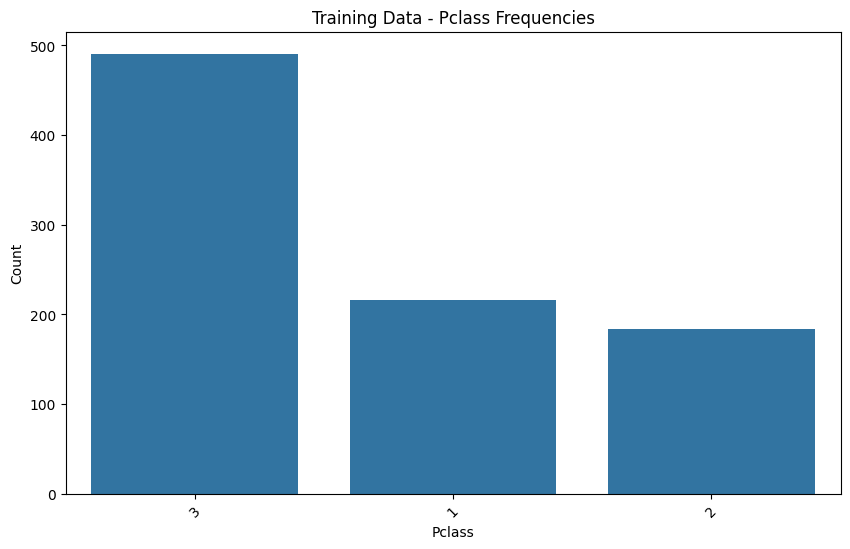

Visualizing test data category frequencies...


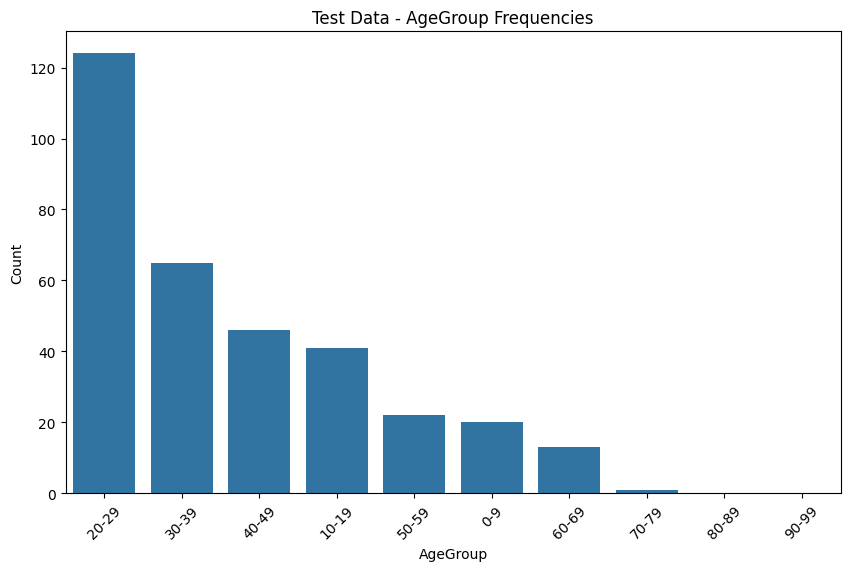

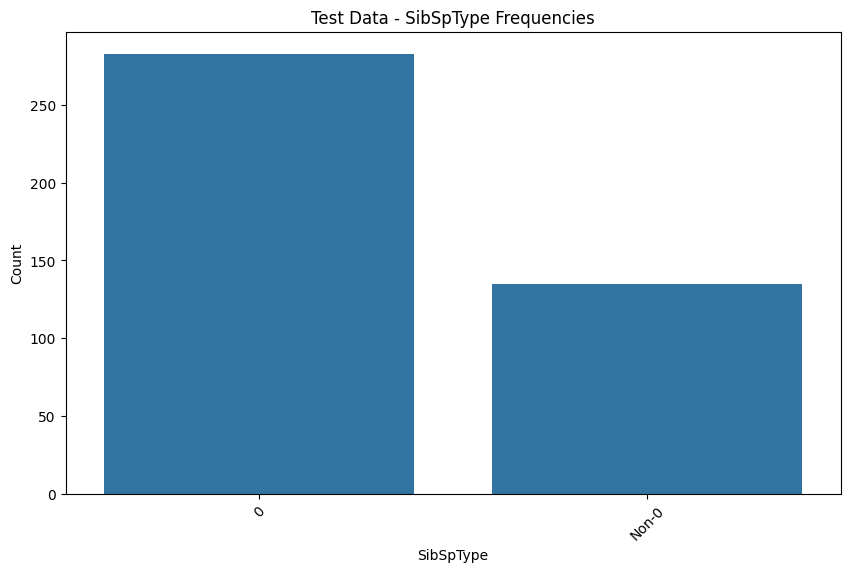

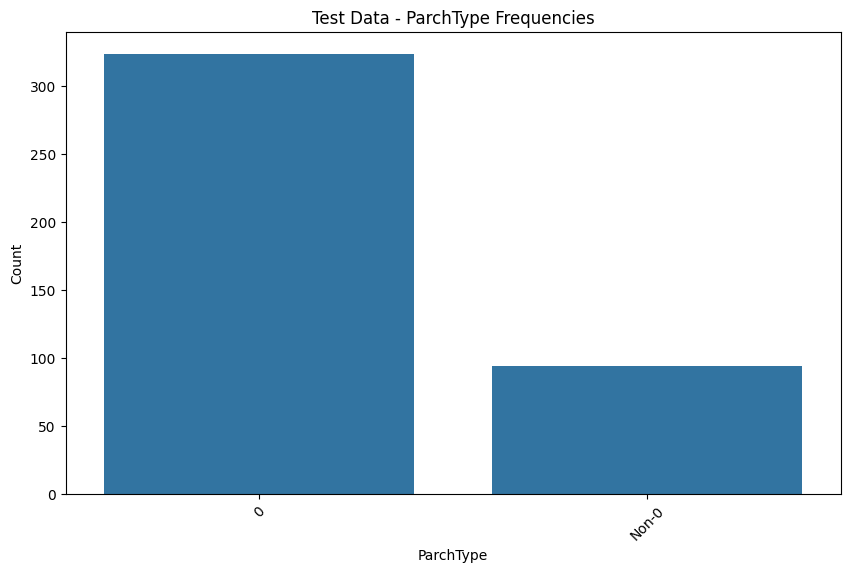

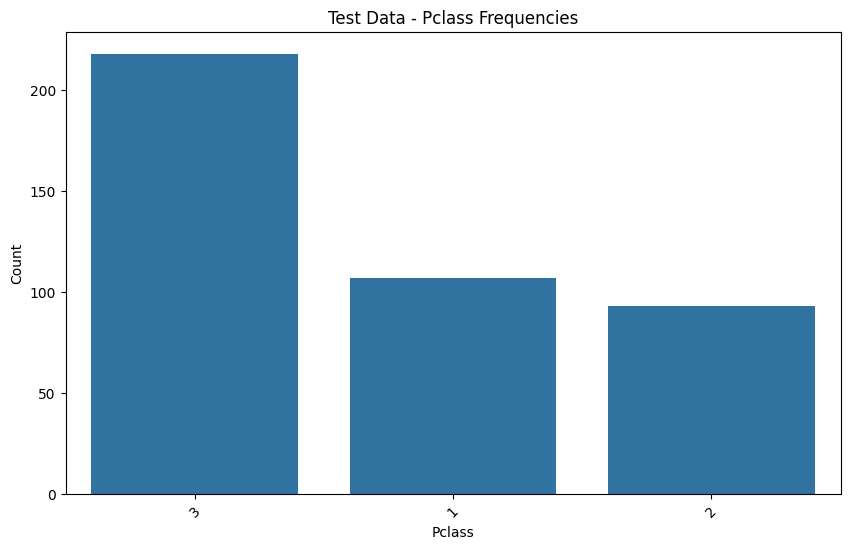

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df_train = pd.read_csv('D:\\train.csv')
df_test = pd.read_csv('D:\\test.csv')

# 나이를 10살 단위로 구간화
df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=range(0, 101, 10), right=False, labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])
df_test['AgeGroup'] = pd.cut(df_test['Age'], bins=range(0, 101, 10), right=False, labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])

# SibSp와 Parch를 0 또는 0이 아닌 경우로 나누기
df_train['SibSpType'] = df_train['SibSp'].apply(lambda x: '0' if x == 0 else 'Non-0')
df_test['SibSpType'] = df_test['SibSp'].apply(lambda x: '0' if x == 0 else 'Non-0')

df_train['ParchType'] = df_train['Parch'].apply(lambda x: '0' if x == 0 else 'Non-0')
df_test['ParchType'] = df_test['Parch'].apply(lambda x: '0' if x == 0 else 'Non-0')

# Pclass를 범주형 변수로 선언
df_train['Pclass'] = df_train['Pclass'].astype('category')
df_test['Pclass'] = df_test['Pclass'].astype('category')

# 범주형 변수의 빈도수 시각화 함수 정의
def plot_category_frequencies(df, columns, title_prefix=""):
    for column in columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=column, order=df[column].value_counts().index)
        plt.title(f'{title_prefix} {column} Frequencies')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

# 훈련 데이터와 테스트 데이터의 범주형 변수 빈도수 시각화
print("Visualizing training data category frequencies...")
plot_category_frequencies(df_train, ['AgeGroup', 'SibSpType', 'ParchType', 'Pclass'], title_prefix="Training Data -")

print("Visualizing test data category frequencies...")
plot_category_frequencies(df_test, ['AgeGroup', 'SibSpType', 'ParchType', 'Pclass'], title_prefix="Test Data -")


In [48]:
# 데이터 로드
df_train = pd.read_csv('D:\\train.csv')
df_test = pd.read_csv('D:\\test.csv')

# 나이를 10살 단위로 구간화
df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=range(0, 101, 10), right=False, labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])
df_test['AgeGroup'] = pd.cut(df_test['Age'], bins=range(0, 101, 10), right=False, labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])

# SibSp와 Parch를 0 또는 0이 아닌 경우로 나누기
df_train['SibSpType'] = df_train['SibSp'].apply(lambda x: '0' if x == 0 else 'Non-0')
df_test['SibSpType'] = df_test['SibSp'].apply(lambda x: '0' if x == 0 else 'Non-0')

df_train['ParchType'] = df_train['Parch'].apply(lambda x: '0' if x == 0 else 'Non-0')
df_test['ParchType'] = df_test['Parch'].apply(lambda x: '0' if x == 0 else 'Non-0')

# Pclass를 범주형 변수로 선언
df_train['Pclass'] = df_train['Pclass'].astype('category')
df_test['Pclass'] = df_test['Pclass'].astype('category')

# 필요한 열만 선택하고, 범주형 변수에 대해 더미 변수 생성
df_train_encoded = pd.get_dummies(df_train[['AgeGroup', 'SibSpType', 'ParchType', 'Pclass', 'Survived']], drop_first=True)
df_test_encoded = pd.get_dummies(df_test[['AgeGroup', 'SibSpType', 'ParchType', 'Pclass']], drop_first=True)

# 'AgeGroup_90-99' 변수를 제거합니다.
df_train_encoded = df_train_encoded.drop(columns=['AgeGroup_90-99'], errors='ignore')
df_test_encoded = df_test_encoded.drop(columns=['AgeGroup_90-99'], errors='ignore')

# 목표 변수와 설명 변수 정의
X_train = df_train_encoded.drop('Survived', axis=1)
y_train = df_train_encoded['Survived']

X_test = df_test_encoded

# 결측값 확인 및 처리
print("Checking for NaN values in training data:")
print(X_train.isnull().sum())
print(y_train.isnull().sum())

# NaN 값이 있는 경우, 적절히 처리합니다. 예를 들어, NaN 값을 0으로 대체할 수 있습니다.
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# 데이터 타입 확인
print("Data types of training data:")
print(X_train.dtypes)
print(y_train.dtypes)

# bool 타입을 int 타입으로 변환
X_train = X_train.astype(int)
y_train = y_train.astype(int)

# 상수항 추가
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# 상수항 추가 후 데이터 확인
print("Data after adding constant:")
print(X_train_const.head())

# VIF 계산 및 출력
# VIF를 계산합니다
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif_data)


# 로지스틱 회귀 모델 학습
try:
    model = sm.Logit(y_train, X_train_const)
    result = model.fit(disp=0)
    
    # 모델 요약 출력
    print(result.summary())
    
    # 예측 확률 생성
    y_pred_train_prob = result.predict(X_train_const)  # 훈련 데이터에 대한 예측 확률
    y_pred_test_prob = result.predict(X_test_const)    # 테스트 데이터에 대한 예측 확률
    
    # ROC 곡선 계산 (훈련 데이터에 대해)
    fpr, tpr, thresholds = roc_curve(y_train, y_pred_train_prob)
    auc = roc_auc_score(y_train, y_pred_train_prob)
    
    # ROC 곡선 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    # 예측값을 0 또는 1로 변환 (임계값을 0.5로 사용)
    y_pred = (y_pred_test_prob > 0.5).astype(int)
    
    # 예측 결과를 DataFrame에 추가
    df_test['Survived_Predicted'] = y_pred
    
    # 예측 결과 출력
    print(df_test[['PassengerId', 'Survived_Predicted']].head())
except Exception as e:
    print(f"An error occurred: {e}")

Checking for NaN values in training data:
AgeGroup_10-19     0
AgeGroup_20-29     0
AgeGroup_30-39     0
AgeGroup_40-49     0
AgeGroup_50-59     0
AgeGroup_60-69     0
AgeGroup_70-79     0
AgeGroup_80-89     0
SibSpType_Non-0    0
ParchType_Non-0    0
Pclass_2           0
Pclass_3           0
dtype: int64
0
Data types of training data:
AgeGroup_10-19     bool
AgeGroup_20-29     bool
AgeGroup_30-39     bool
AgeGroup_40-49     bool
AgeGroup_50-59     bool
AgeGroup_60-69     bool
AgeGroup_70-79     bool
AgeGroup_80-89     bool
SibSpType_Non-0    bool
ParchType_Non-0    bool
Pclass_2           bool
Pclass_3           bool
dtype: object
int64
Data after adding constant:
   const  AgeGroup_10-19  AgeGroup_20-29  AgeGroup_30-39  AgeGroup_40-49  \
0    1.0               0               1               0               0   
1    1.0               0               0               1               0   
2    1.0               0               1               0               0   
3    1.0              

c:\Users\04-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [49]:
X_train_const.describe()

,const,AgeGroup_10-19,AgeGroup_20-29,AgeGroup_30-39,AgeGroup_40-49,AgeGroup_50-59,AgeGroup_60-69,AgeGroup_70-79,AgeGroup_80-89,SibSpType_Non-0,ParchType_Non-0,Pclass_2,Pclass_3
count,891.0,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,1.0,0.114478,0.246914,0.187430,0.099888,0.053872,0.021324,0.006734,0.001122,0.317621,0.239057,0.206510,0.551066
std,0.0,0.318570,0.431458,0.390475,0.300019,0.225892,0.144544,0.081830,0.033501,0.465813,0.426747,0.405028,0.497665
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
